In [52]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


In [53]:
df1 = pd.read_csv("bengaluru_house_prices.csv")

In [54]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [55]:
df1.shape

(13320, 9)

In [56]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [57]:
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [58]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [59]:
countvalue=df1["availability"].value_counts()
print(len(countvalue))

81


In [60]:
countvalue=df1["location"].value_counts()
print(len(countvalue))

1305


 ## Drop features that are not required to build our model



In [61]:
# drop some culms that dont usfull for our prediction
df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.shape

(13320, 6)

In [62]:
# df1.head()

In [63]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [64]:
df2.isnull().values.any()


True

In [65]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [66]:
df2.mean()


C:\Users\Asus\AppData\Local\Temp\ipykernel_10520\4014903367.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.mean()


bath         2.692610
balcony      1.584376
price      112.565627
dtype: float64

In [67]:
df2["balcony"].fillna(1.584376)


0        1.000000
1        3.000000
2        3.000000
3        1.000000
4        1.000000
           ...   
13315    0.000000
13316    1.584376
13317    1.000000
13318    1.000000
13319    1.000000
Name: balcony, Length: 13320, dtype: float64

In [68]:
#beacuse our null data isnt too much we drop them
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [69]:
df3.shape

(12710, 6)

In [70]:
df3['bhk'] = df3['size'].apply(lambda x: (x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Asus\AppData\Local\Temp\ipykernel_10520\822773500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: (x.split(' ')[0]))


array(['2', '4', '3', '1', '6', '8', '7', '5', '11', '9', '27', '43',
       '14', '12', '10', '13'], dtype=object)

In [71]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [72]:
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [73]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [74]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

df4 = df4[df4.total_sqft.notnull()]
df4.head(20)



,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


##Add new feature called price per square feet



In [75]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*1000000 / df5['total_sqft'] 

df5.head(20)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,32478.632479
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,48282.442748
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,38888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,105924.596050
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,38000.000000


In [76]:
len(df5.location.unique())

1259

In [77]:
df5.location = df5.location.apply(lambda x: x.strip())

df5.shape


(12668, 8)

In [78]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: location, Length: 1248, dtype: int64

In [79]:
location_stats_less_than_10 = location_stats[location_stats<= 10]
location_stats_less_than_10

1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: location, Length: 1013, dtype: int64

In [80]:
len(df5.location.unique())


1248

In [81]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())


236

In [82]:
len(df5.location.unique())


236

In [83]:
len(location_stats)


1248

In [84]:
len(location_stats[location_stats<=10])


1013

In [85]:
#normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft


df5 = df5.astype({"bhk": float})
df5[df5.total_sqft /df5.bhk<300].head()


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6.0,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8.0,62962.962963
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3.0,200000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2.0,47826.086957
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6.0,225352.112676


In [86]:
df5.shape


(12668, 8)

In [87]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12013, 8)

Outlier Removal Using Standard Deviation and Mean

In [88]:
df6.price_per_sqft.describe()


count    1.201300e+04
mean     6.206082e+04
std      3.985519e+04
min      2.678298e+03
25%      4.199363e+04
50%      5.252525e+04
75%      6.823529e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

In [104]:


# # Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, 
# this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation



def remove_pps_outliers(df): #pps :remove_pps_outliers
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df6)
df8.shape




(9852, 8)

In [105]:
df7

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.00,4.0,150175.438596
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.00,3.0,119018.404908
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.00,3.0,125333.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.00,3.0,108333.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.00,2.0,119838.056680
...,...,...,...,...,...,...,...,...
9847,other,2 BHK,1256.0,2.0,1.0,65.00,2.0,51751.592357
9848,other,2 BHK,1353.0,2.0,2.0,110.00,2.0,81300.813008
9849,other,1 Bedroom,812.0,1.0,0.0,26.00,1.0,32019.704433
9850,other,3 BHK,1440.0,2.0,2.0,63.93,3.0,44395.833333


Outlier Removal Using Bathrooms Feature

In [106]:
df7.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

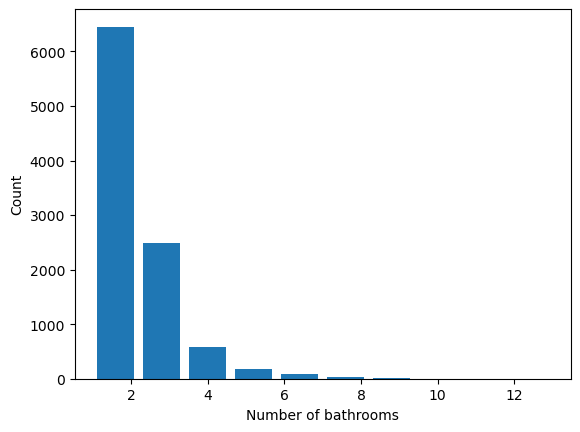

In [107]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [108]:
df8[df8.bath>10]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9267,other,13 BHK,5425.0,13.0,0.0,275.0,13.0,50691.24424


In [109]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>df8.bhk+2]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4.0,32520.325203
6443,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3.0,64230.343300
8082,other,6 BHK,11338.0,9.0,1.0,1000.0,6.0,88198.976892


In [110]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(9771, 8)

Use One Hot Encoding For Location



In [111]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df10 = pd.concat([df9,dummies],axis='columns')
df10.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4.0,150175.438596,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3.0,119018.404908,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3.0,125333.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3.0,108333.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2.0,119838.056680,1,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df11 = df10.drop(['size','location'],axis='columns')
df11.head(20)

,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,428.0,4.0,150175.438596,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3.0,119018.404908,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3.0,125333.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3.0,108333.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2.0,119838.056680,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,0.0,413.0,4.0,150181.818182,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,2.0,368.0,4.0,150204.081633,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2825.0,4.0,3.0,250.0,4.0,88495.575221,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,1.0,167.0,3.0,89066.666667,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2065.0,4.0,1.0,210.0,3.0,101694.915254,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build a Model Now...


In [114]:
df11.shape


(9852, 242)

In [115]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,4.0,150175.438596,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3.0,119018.404908,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3.0,125333.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X.shape


(9852, 241)

In [127]:
y = df11.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [128]:
len(y)


9852

In [129]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [133]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [140]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]